# [Scatter(산점도) 살펴보기]
https://matplotlib.org/stable/gallery/lines_bars_and_markers/index.html  
![scatter](https://matplotlib.org/stable/_images/sphx_glr_polar_bar_001_2_00x.png)
위 사이트 참고  
-corr()

In [2]:
import pandas as pd
import numpy as np

In [3]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


## (2) 데이터 준비

In [6]:
file="../DATA/auto-mpg.csv"

## (3) 데이터 불러오기

In [14]:
mpgDF = pd.read_csv(file, sep="\s+", 
                    names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])
# columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
mpgDF


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [15]:
mpgDF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [16]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터의 값의 종류 즉 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입 

In [27]:
for col in mpgDF.columns:
    print(f"================= {col} =================")
    print(mpgDF[col].unique(), end="\n\n")
    print(mpgDF[col].nunique(), end="\n\n")
    print(mpgDF[col].nunique(dropna=False))
    # dropna 파라미터 설정으로 컬럼의 결측치 데이터 수까지 확인 가능
    print("\n\n")

================= mpg =================
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

129

129



================= cylinders =================
[8 4 6 3 5]

5

5



================= displacement =================
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  2

## (5) 데이터 전처리
- 결측치 체크 => 꼭 NaN이 아닐 수 있음
- 중복값 체크
- 이상치 체크 => 이상치 컬럼의 범위를 벗어난 값, 잘못 입력된 값
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

### (5)-1 결측치 체크 및 처리 ==> 
horse power는 결측치는 없지만 이상치가 있음 이 이상치를 NaN으로

In [29]:
mpgDF.horsepower.nunique()

94

In [47]:
mpgDF.horsepower.value_counts()

horsepower
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: count, Length: 93, dtype: int64

In [34]:
mpgDF.horsepower.value_counts()["?"]

6

In [37]:
mpgDF["horsepower"].replace("?", np.nan, inplace=True)

In [38]:
mpgDF.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [40]:
mpgDF.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### (5)-2 표준화 ==> 연속형 즉 수치 자료형 -----> 범주형 자료형 변환
- 46~230 범위 실수 수치값 ===> 저출력/중출력/고출력
- 구간 분할 (Binning)

In [51]:
mpgDF.horsepower=mpgDF.horsepower.astype("float32")

In [52]:
mpgDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [54]:
pd.cut(np.array([1,7,5,4,6,3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [55]:
pd.cut(np.array([1,7,5,4,6,3]), 3, labels=["A", "B", "C"])

['A', 'C', 'B', 'B', 'C', 'A']
Categories (3, object): ['A' < 'B' < 'C']

In [63]:
out, ret = pd.cut(mpgDF.horsepower, bins = 3, labels = ["저마력", "중마력", "고마력"], retbins=True)
type(out), ret

(pandas.core.series.Series,
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [64]:
mpgDF.horsepower = out

### (5)-3 데이터 표준화 => 범주형 => 연속형/수치화 변환 : One-Hot-Encoding 방식

In [62]:
pd.get_dummies(mpgDF.origin, dtype="int")

,EU,JPN,USA
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


In [58]:
# pandas.get_dummies()함수
# mpgDF에 origin 컬럼을 변환 => 1, 2, 3 범주형

In [59]:
mpgDF['origin'].replace({1:"USA", 2:"EU", 3:"JPN"}, inplace=True)

In [60]:
mpgDF['origin'] = mpgDF['origin'].astype("category")

## (6) 연비 mpg 컬럼과 관계가 가장 높은 컬럼

In [66]:
corrDF = mpgDF.corr(numeric_only=True)
corrDF["mpg"][1:]

cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [67]:
corrDF["mpg"][1:].sort_values()

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

시각화로 연비 mpg 컬럼의 관계 확인

In [69]:
import matplotlib.pyplot as plt

In [79]:
def scatterplot(sr1, sr2):
    '''
    parameters:
    col1, col2 : Series object 
    '''
    plt.scatter(sr1, sr2)
    plt.title(f"{sr1.name} - {sr2.name} [{round(corrDF[sr1.name][sr2.name]),2}]")
    plt.xlabel(sr1.name)
    plt.ylabel(sr2.name)
    plt.show()

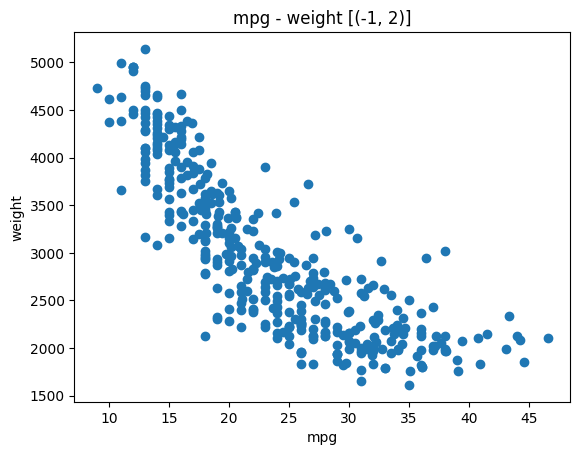

In [80]:
scatterplot(mpgDF["mpg"], mpgDF["weight"]) # SR1, SR2

### (6) - 1 연비 mpg 컬럼과 관계가 가장 높은 컬럼

In [90]:
def printScatter(col1, col2):
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.title(f"{col1} - {col2} : {round(corrDF[col1][col2], 4)}")
    plt.show()

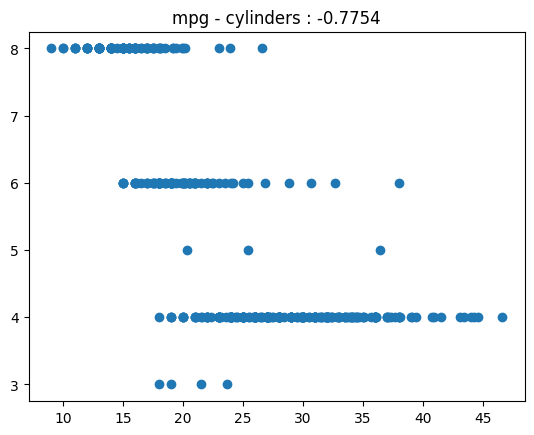

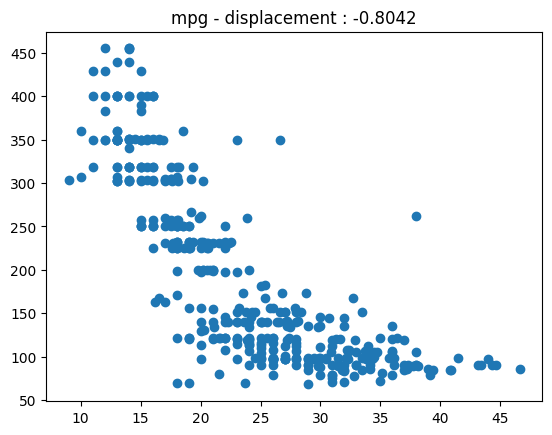

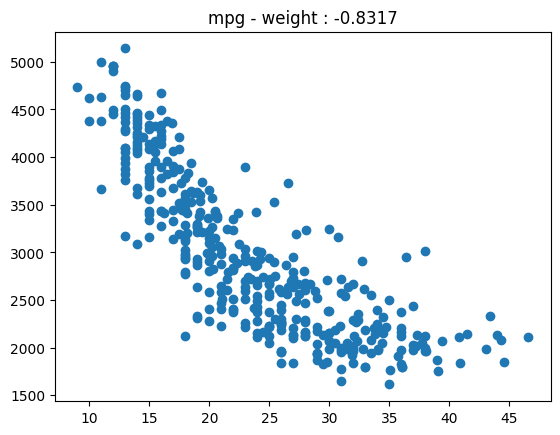

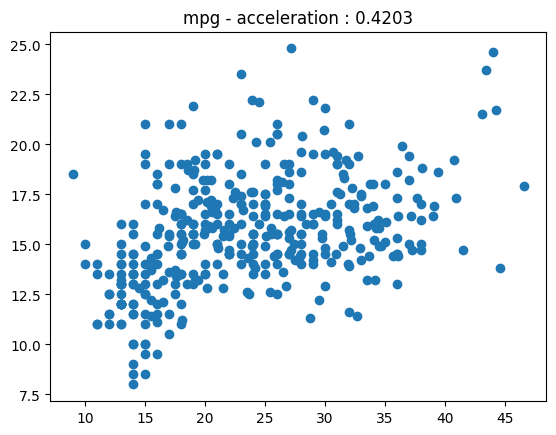

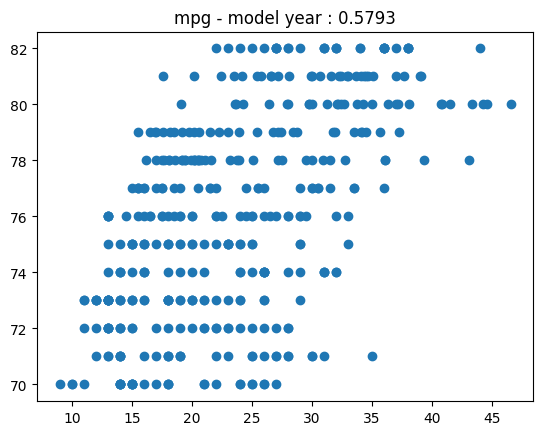

In [91]:
for col in corrDF.columns[1:]: # 1이 mpg라서 mpg랑 mpg를 비교할 필요는 없으니까 패스하고 for문 돌리는 거
    printScatter("mpg", col)

### (6) - 2 자동차 제조사의 데이터 비율

In [98]:
oriSR = mpgDF['origin'].value_counts()
oriSR.index, oriSR.values

(CategoricalIndex(['USA', 'JPN', 'EU'], categories=['EU', 'JPN', 'USA'], ordered=False, dtype='category', name='origin'),
 array([249,  79,  70], dtype=int64))

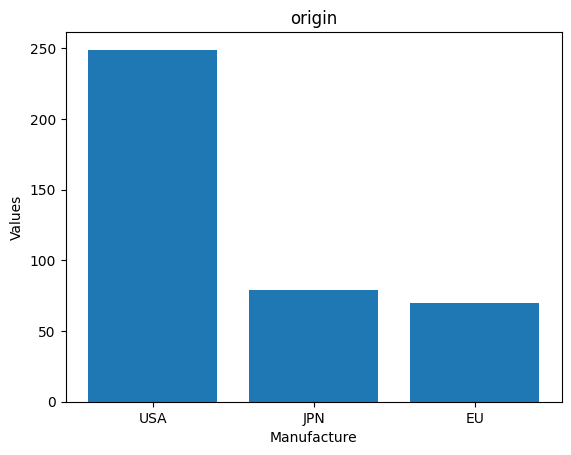

In [103]:
plt.bar(oriSR.index, oriSR.values)
plt.title("origin")
plt.xlabel("Manufacture")
plt.ylabel("Values")
plt.show()

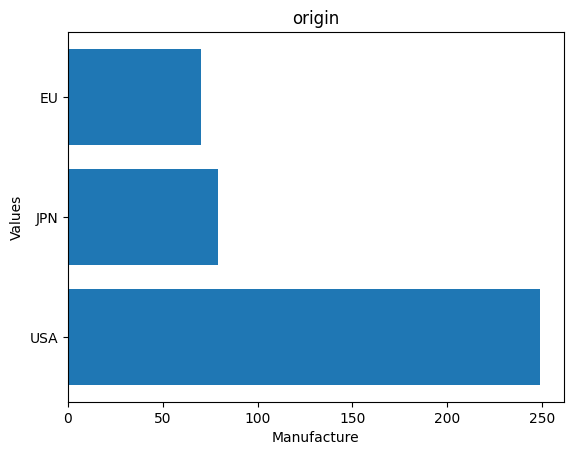

In [104]:
plt.barh(oriSR.index, oriSR.values)
plt.title("origin")
plt.xlabel("Manufacture")
plt.ylabel("Values")
plt.show()

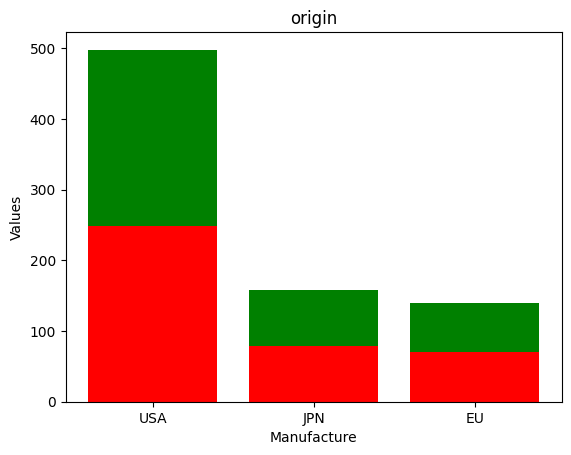

In [107]:
plt.bar(oriSR.index, oriSR.values, color = "r")
plt.bar(oriSR.index, oriSR.values, color = "g", bottom = oriSR.values)

plt.title("origin")
plt.xlabel("Manufacture")
plt.ylabel("Values")
plt.show()

## 다중 그래프
- 방법 1) fig, ax= plt.subplots() => 튜플 반환
- 방법 2) plt.subplot(행, 열, 인), plt.subplot(3, 1, 1), plt.subplot(3, 1, 2), plt.subplot(3, 1, 3))
- 방법 3) add_subplot

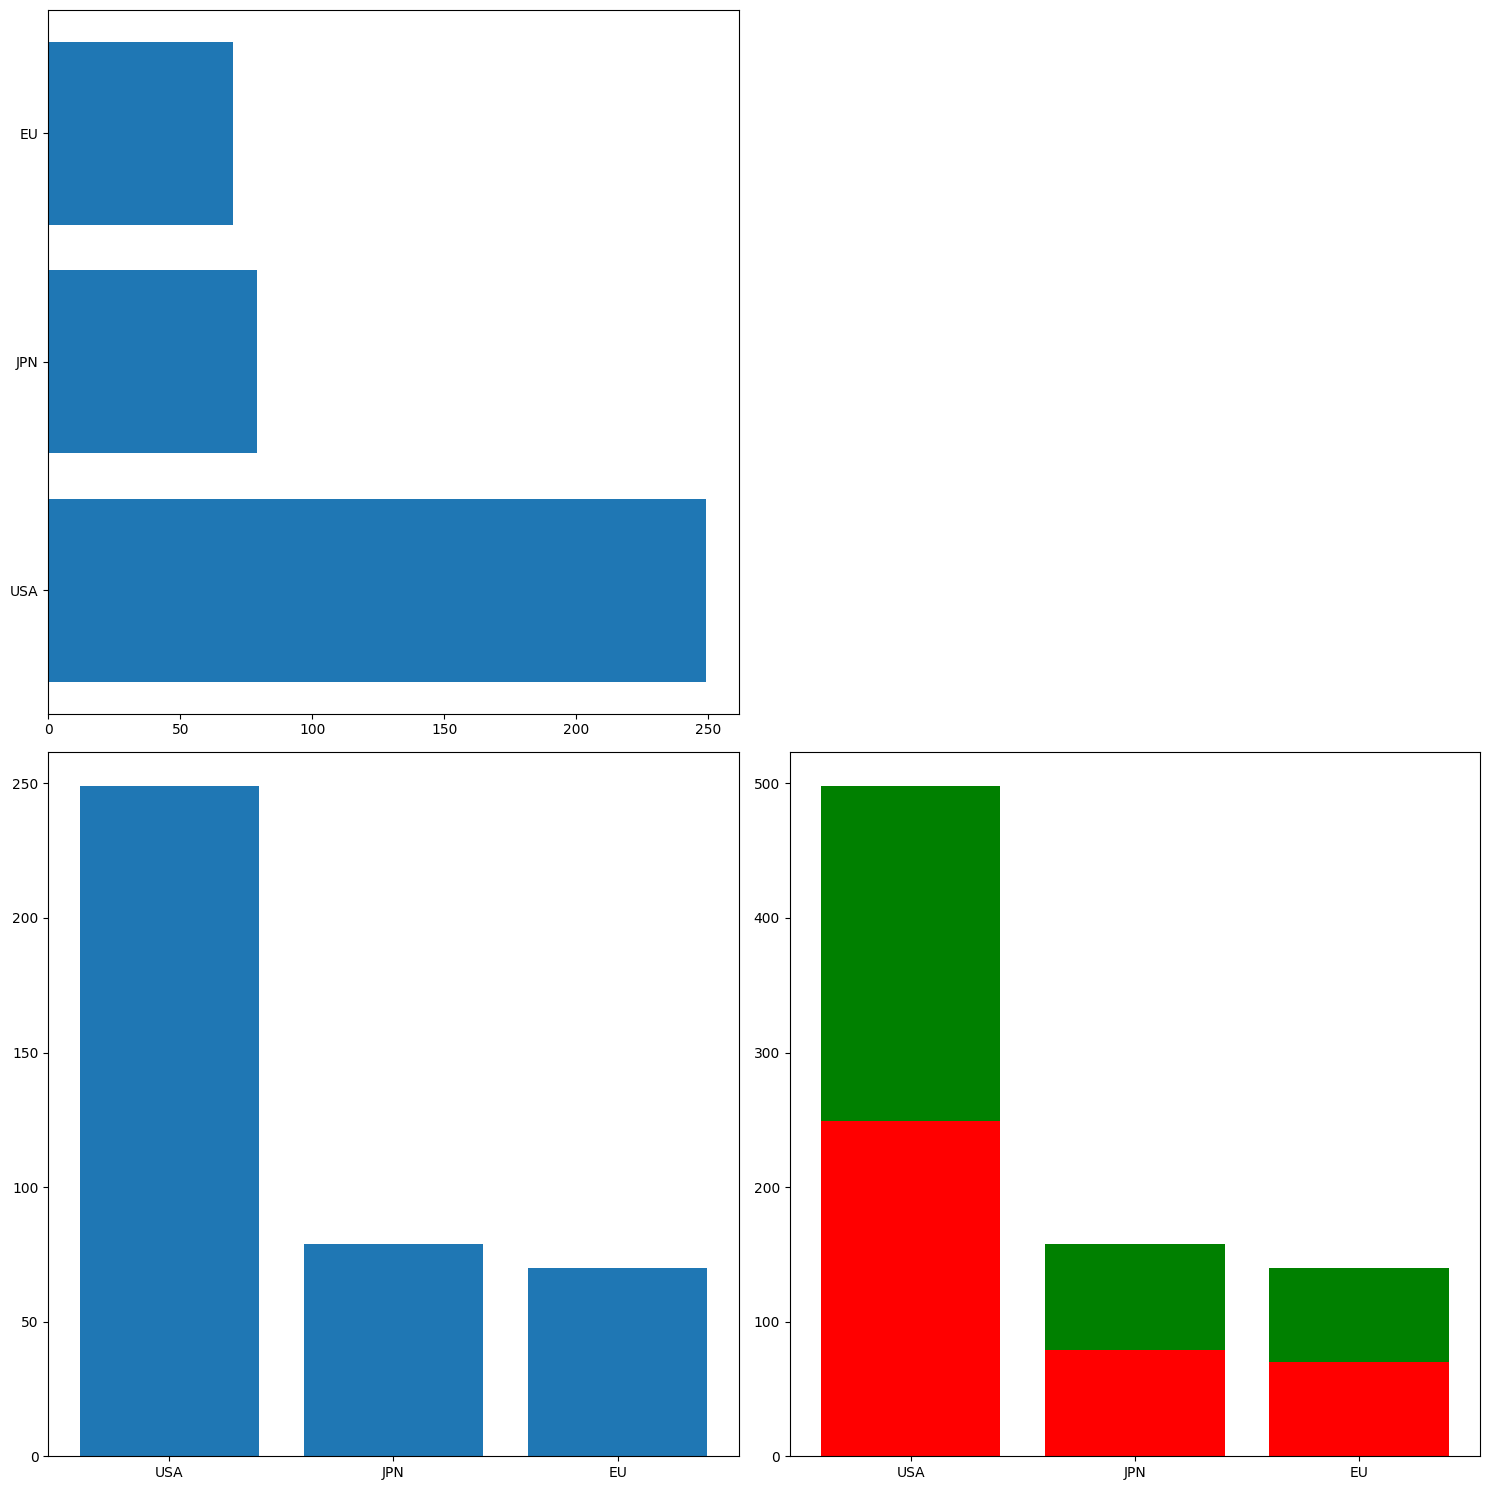

In [110]:
plt.figure(figsize=(15,15)) # inch 단위 입니
plt.subplot(2, 2, 1)
plt.barh(oriSR.index, oriSR.values)

plt.subplot(2, 2, 3)
plt.bar(oriSR.index, oriSR.values)

plt.subplot(2, 2, 4)
plt.bar(oriSR.index, oriSR.values, color = "r")
plt.bar(oriSR.index, oriSR.values, color = "g", bottom = oriSR.values)

plt.tight_layout()
plt.show()

C:\Users\kdp\AppData\Local\Temp\ipykernel_4580\3868360366.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(311)
C:\Users\kdp\AppData\Local\Temp\ipykernel_4580\3868360366.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


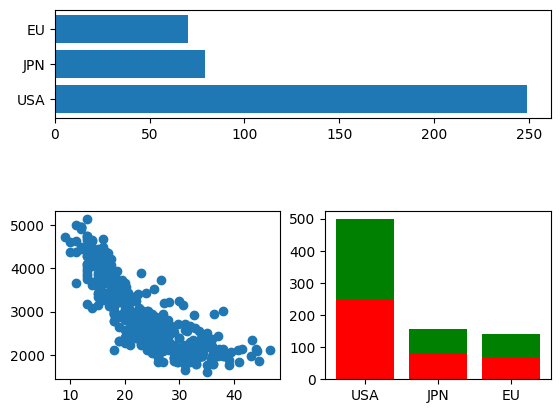

In [115]:
fig, ax= plt.subplots()

plt.subplot(311)
plt.barh(oriSR.index, oriSR.values)

plt.subplot(223)
plt.scatter(mpgDF["mpg"], mpgDF["weight"])

plt.subplot(224)
plt.bar(oriSR.index, oriSR.values, color = "r")
plt.bar(oriSR.index, oriSR.values, color = "g", bottom = oriSR.values)

plt.tight_layout()
plt.show()


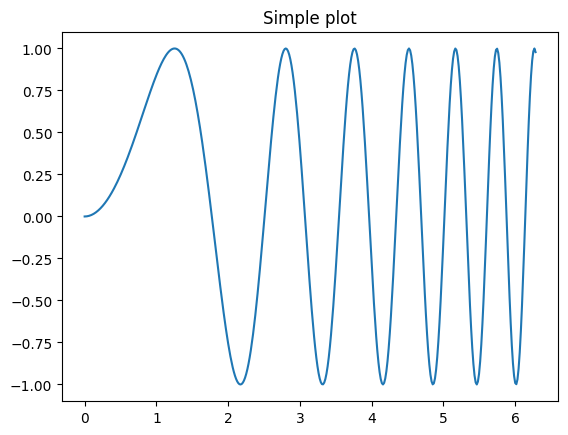

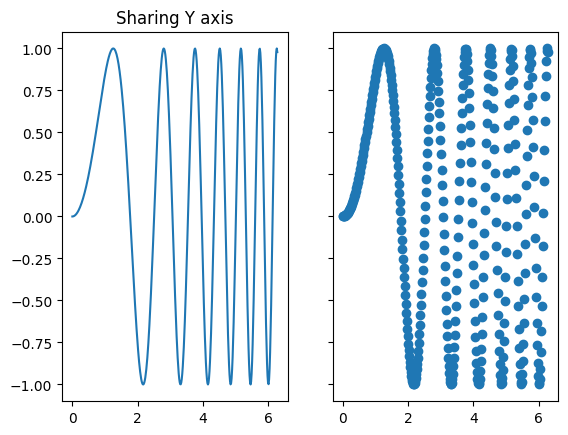

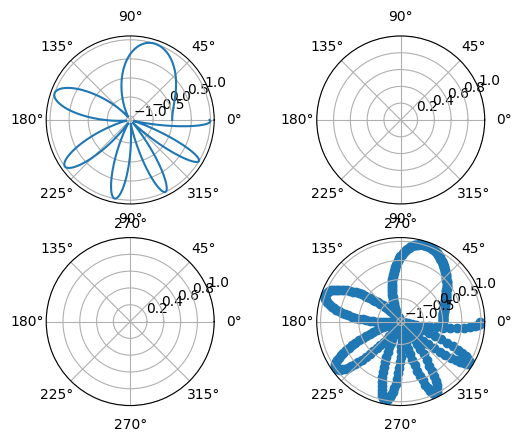

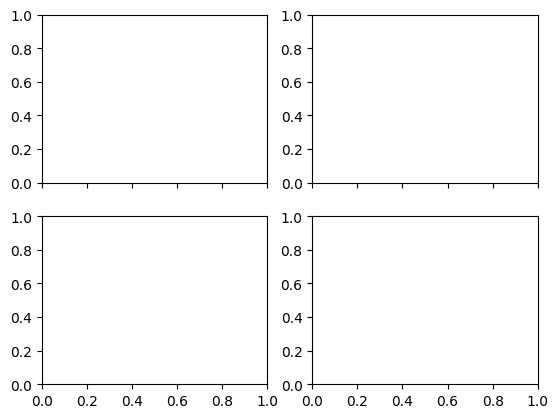

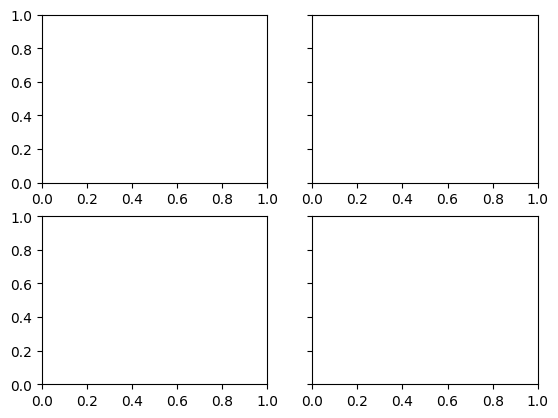

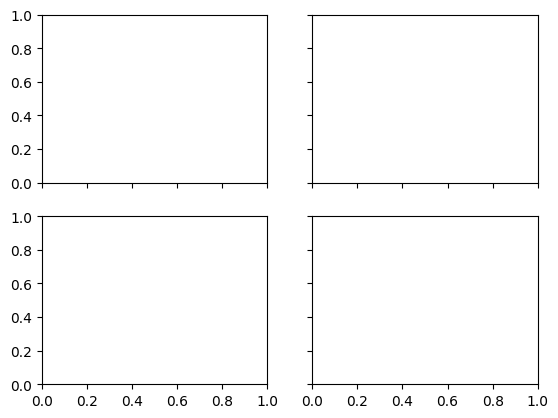

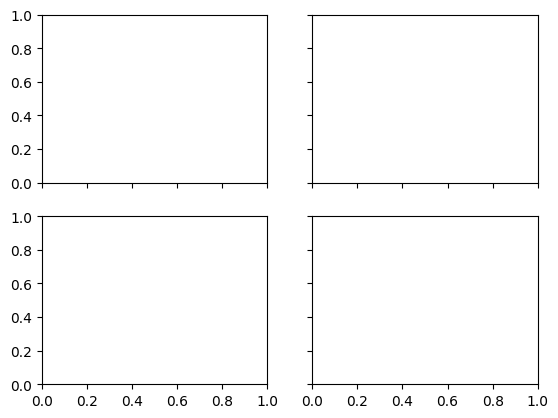

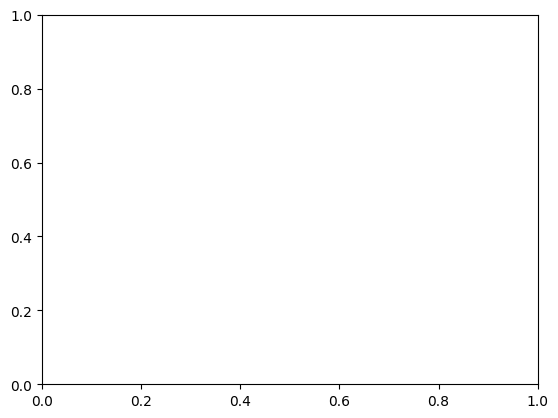

In [116]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # y축 공유 
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)
# 0,1 / 1,0 자리는 그냥 비워둠 

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col') # x축 공유 

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all') # y축 공유 

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

# 아무것도 안넣으면 표만 뜨고 출력은 안됨 